##### Arhaan Girdhar - 220962050


## Question 1

a. Create a CSV file with sample data.
</br>
b. Write a Python function program to:
Find the fitted simple linear and polynomial regression equations for the given data.
</br>
c. Compare the coefficients obtained from manually intuitive and matrix formulation methods with
your program.
</br>
d. Plot the scatterplot of the raw data and then another scatterplot with lines pertaining to a linear fit
and a quadratic fit overlayed.
</br>
e. Compute the error, MSE, and RMSE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Week4Q1.csv')
X = data['Temp'].values
y = data['Yield'].values

In [3]:
X

array([ 50,  50,  50,  70,  70,  70,  80,  80,  80,  90,  90,  90, 100,
       100, 100])

In [4]:
y

array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3. , 3.1, 2.8, 3.3,
       3.5, 3. ])

In [5]:
lin_reg = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(lin_reg, y, rcond=None)[0]

In [6]:
m

0.006756756756756736

In [7]:
c

2.3063063063063094

In [8]:
mult_reg = np.vstack([X**2, X, np.ones(len(X))]).T
a, b, c_poly = np.linalg.lstsq(mult_reg, y, rcond=None)[0]

In [9]:
a

0.001075601374570447

In [10]:
b

-0.1537113402061856

In [11]:
c_poly

7.9604810996563575

In [12]:
y_pred_linear = m * X + c
y_pred_mult = a * X**2 + b * X + c_poly
mse_linear = np.mean((y - y_pred_linear)**2)
rmse_linear = np.sqrt(mse_linear)
mse_poly = np.mean((y - y_pred_mult)**2)
rmse_poly = np.sqrt(mse_poly)

In [13]:
mse_linear

0.13270870870870868

In [14]:
mse_poly

0.04778465063001147

In [15]:
rmse_linear

0.3642920651190589

In [18]:
rmse_poly

0.21859700508015079

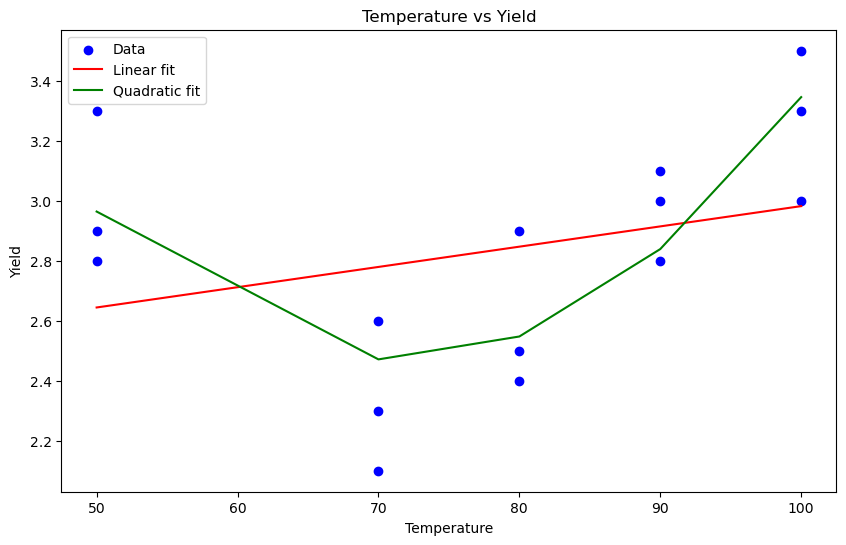

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_linear, color='red', label='Linear fit')
plt.plot(X, y_pred_mult, color='green', label='Quadratic fit')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Temperature vs Yield')
plt.legend()
plt.show()

## Question 2

a. Create a CSV file with sample data.
</br>
b. Write a Python function program to:
</br>
c. Find the fitted multiple linear regression equation for the given data.
</br>
d. Compare the coefficients obtained manually using intuitive and matrix formulation methods with
your program.
</br>
e. Plot the data adorned with the estimated regression equation.
</br>
f. Compute the error, MSE, and RMSE.

In [20]:
df1 = pd.read_csv('Week4Q2.csv')
df1

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0
5,0.311,0.82,3,0,0
6,0.418,0.95,3,0,0
7,0.480,1.06,3,0,0
8,0.687,1.20,3,0,0
9,0.847,1.47,3,0,0


In [21]:
X = df1[['Area', 'Group', 'X2', 'X3']].values
y = df1['Infarc'].values

In [22]:
X

array([[0.34, 3.  , 0.  , 0.  ],
       [0.64, 3.  , 0.  , 0.  ],
       [0.76, 3.  , 0.  , 0.  ],
       [0.83, 3.  , 0.  , 0.  ],
       [0.73, 3.  , 0.  , 0.  ],
       [0.82, 3.  , 0.  , 0.  ],
       [0.95, 3.  , 0.  , 0.  ],
       [1.06, 3.  , 0.  , 0.  ],
       [1.2 , 3.  , 0.  , 0.  ],
       [1.47, 3.  , 0.  , 0.  ],
       [0.44, 1.  , 1.  , 0.  ],
       [0.77, 1.  , 1.  , 0.  ],
       [0.9 , 1.  , 1.  , 0.  ],
       [1.07, 1.  , 1.  , 0.  ],
       [1.01, 1.  , 1.  , 0.  ],
       [1.03, 1.  , 1.  , 0.  ],
       [1.16, 1.  , 1.  , 0.  ],
       [1.21, 1.  , 1.  , 0.  ],
       [1.2 , 1.  , 1.  , 0.  ],
       [1.22, 1.  , 1.  , 0.  ],
       [0.99, 1.  , 1.  , 0.  ],
       [0.77, 2.  , 0.  , 1.  ],
       [1.05, 2.  , 0.  , 1.  ],
       [1.06, 2.  , 0.  , 1.  ],
       [1.02, 2.  , 0.  , 1.  ],
       [0.99, 2.  , 0.  , 1.  ],
       [0.97, 2.  , 0.  , 1.  ],
       [1.12, 2.  , 0.  , 1.  ],
       [1.23, 2.  , 0.  , 1.  ],
       [1.19, 2.  , 0.  , 1.  ],
       [1.

In [23]:
y

array([0.119, 0.19 , 0.395, 0.469, 0.13 , 0.311, 0.418, 0.48 , 0.687,
       0.847, 0.062, 0.122, 0.033, 0.102, 0.206, 0.249, 0.22 , 0.299,
       0.35 , 0.35 , 0.588, 0.379, 0.149, 0.316, 0.39 , 0.429, 0.477,
       0.439, 0.446, 0.538, 0.625, 0.974])

In [24]:
X_transpose = X.T
coefficients = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

In [25]:
coefficients

array([ 0.61265498, -0.04484546, -0.33317315, -0.11050115])

In [26]:
y_pred = X @ coefficients

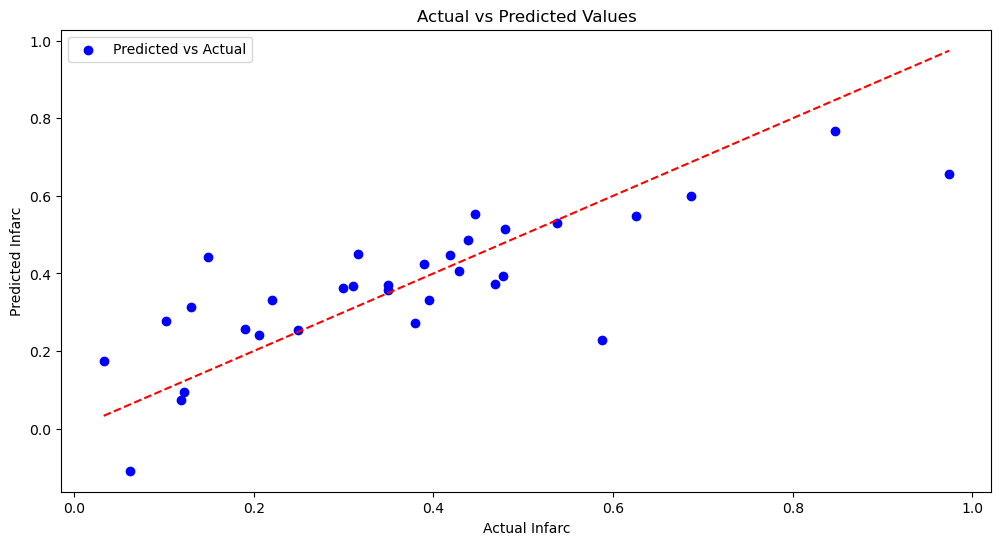

In [27]:
plt.figure(figsize=(12, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Infarc')
plt.ylabel('Predicted Infarc')
plt.title('Actual vs Predicted Values')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.legend()
plt.show()

In [28]:
residuals = y - y_pred
residuals

array([ 0.04523369, -0.06756281,  0.0639186 ,  0.09503275, -0.18270175,
       -0.0568407 , -0.02948585, -0.0348779 ,  0.08635041,  0.08093356,
        0.17045042,  0.02827428, -0.14037087, -0.17552221, -0.03476291,
       -0.00401601, -0.11266116, -0.06429391, -0.00716736, -0.01942046,
        0.35949019,  0.10744774, -0.29409565, -0.1332222 , -0.034716  ,
        0.02266365,  0.08291675, -0.0469815 , -0.10737355,  0.00913265,
        0.077753  ,  0.31647511])

In [29]:
mse = np.mean(residuals**2)
mse

0.0170284226245642

In [30]:
rmse = np.sqrt(mse)
rmse

0.13049299837372194